### Set up

Importing the data is taken care by kaggle.<br>
Just upload your kaggle.json API token file(You can get it from your accounts page on Kaggle)

In [ ]:
from google.colab import files

files.upload()

In [ ]:
!pip3 install geopandas
!pip install cartopy
!pip3 install mplleaflet
! pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 2.1 MB/s 
     |████████████████████████████████| 16.7 MB 55.0 MB/s 
     |████████████████████████████████| 6.3 MB 45.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 2.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 47.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |███████████████████████████████

In [ ]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import mplleaflet as mpll

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           8798        268  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            780         34  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2087         68  1.0              
evangower/premier-league-match-data                            Pr

In [ ]:
!kaggle datasets download -d tsiaras/uk-road-safety-accidents-and-vehicles

 96% 137M/142M [00:06<00:00, 21.5MB/s]
100% 142M/142M [00:06<00:00, 21.9MB/s]


In [ ]:
! mkdir train
! unzip uk-road-safety-accidents-and-vehicles.zip -d train

Archive:  uk-road-safety-accidents-and-vehicles.zip
  inflating: train/Accident_Information.csv  
  inflating: train/Vehicle_Information.csv  


In [ ]:
for dirname, _, filenames in os.walk('train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train/Accident_Information.csv
train/Vehicle_Information.csv


In [ ]:
accidents=pd.read_csv("train/Accident_Information.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Initial plots

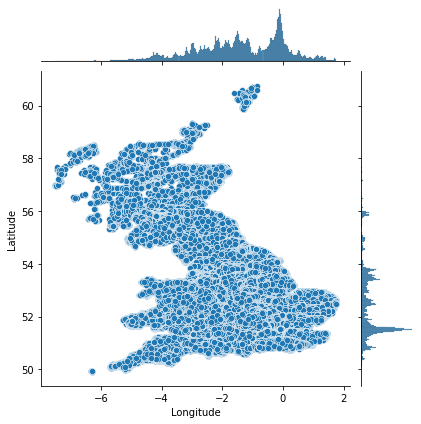

In [ ]:
sns.jointplot(x="Longitude", y="Latitude", data=accidents);

In [ ]:
accidents['Local_Authority_(Highway)'].value_counts().to_frame().head(50)

,Local_Authority_(Highway)
Kent,57801
Surrey,52676
Lancashire,44968
Essex,44161
Hampshire,41600
Birmingham,39662
Hertfordshire,37419
Staffordshire,31083
Lincolnshire,29606
Nottinghamshire,27488


In [ ]:
accidents.dropna(subset=['Latitude','Longitude'], inplace=True)

In [ ]:
accidents.shape

(2047081, 34)

KDE Plot of East Sussex for the year 2005

In [ ]:
sus_acc = accidents.loc[accidents['Local_Authority_(Highway)'] == 'East Sussex']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


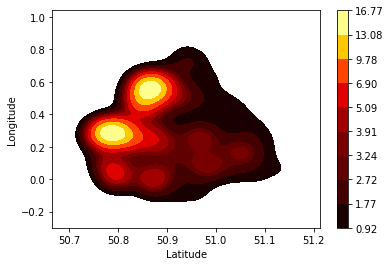

In [ ]:
df = sus_acc[sus_acc['Year']==2005]
ground = sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', cbar=True);

### Weighted

In [ ]:
accidents.loc[accidents['Accident_Severity'] == 'Fatal', 'w1'] = 81
accidents.loc[accidents['Accident_Severity'] == 'Serious', 'w1'] = 16
accidents.loc[accidents['Accident_Severity'] == 'Slight', 'w1'] = 1

**East Sussex KDE Plot**

In [ ]:
sus_acc = accidents.loc[accidents['Local_Authority_(Highway)'] == 'East Sussex']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


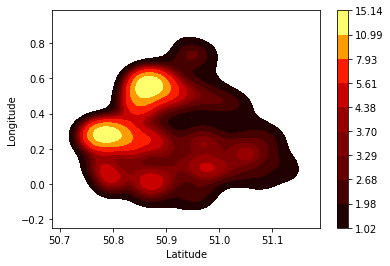

In [ ]:
sns.kdeplot(sus_acc['Latitude'], sus_acc['Longitude'], shade=True, cmap='hot', weights=sus_acc['w1'], cbar=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


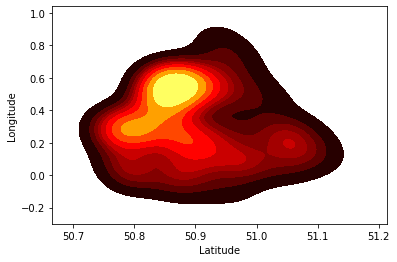

In [ ]:
df = sus_acc[sus_acc['Year']==2005]
sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']);

Converting KDE Plot of East Sussex for the past 13 years into a GIF

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

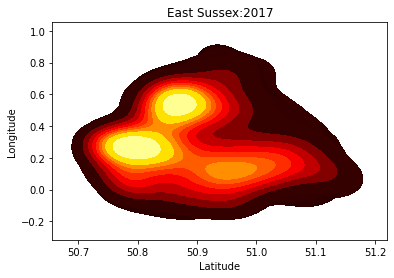

In [ ]:
import matplotlib.pyplot as plt
import imageio
# fig, axes = plt.subplots(13,1, figsize=(10, 65))
filenames = []
for i in range(0,13):
  df = sus_acc[sus_acc['Year']==(i+2005)]
  splot=sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']).set_title("East Sussex:{}".format(i+2005));
  fig=splot.get_figure()
  filename = f'{i}.png'
  filenames.append(filename)
  fig.savefig(filename)
frames=[]
for filename in filenames:
    frames.append(imageio.imread(filename))
      # writer.append_data(image)
imageio.mimsave('sussexplot.gif',frames,'GIF',duration=0.5)
for filename in set(filenames):
    os.remove(filename)

**Hampshire KDE Plot**

In [ ]:
ham_acc = accidents.loc[accidents['Local_Authority_(Highway)'] == 'Hampshire']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


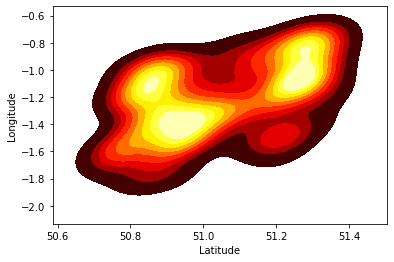

In [ ]:
df = ham_acc[ham_acc['Year']==2005]
sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']);

Converting KDE Plot of Hampshire for the past 13 years into a GIF

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

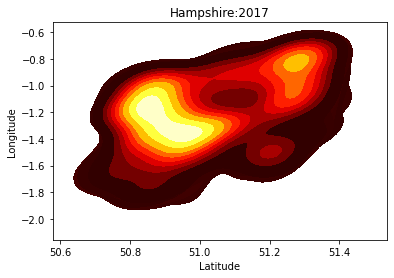

In [ ]:
import matplotlib.pyplot as plt
import imageio
# fig, axes = plt.subplots(13,1, figsize=(10, 65))
filenames = []
for i in range(0,13):
  df = ham_acc[ham_acc['Year']==(i+2005)]
  splot=sns.kdeplot(df['Latitude'], df['Longitude'], shade=True, cmap='hot', weights=df['w1']).set_title("Hampshire:{}".format(i+2005));
  fig=splot.get_figure()
  filename = f'{i}.png'
  filenames.append(filename)
  fig.savefig(filename)
frames=[]
for filename in filenames:
    frames.append(imageio.imread(filename))
      # writer.append_data(image)
imageio.mimsave('hampshireplot.gif',frames,'GIF',duration=0.5)
for filename in set(filenames):
    os.remove(filename)